# Markov decision process II

### Outline of lecture

<code>**1. Markov processes**</code><br>

<code>**2. Markov reward processes**</code><br>

<code>**3. Markov decision processes**</code><br>

<code>**4. Extensions to MDP's**</code><br>


We will be layering more complexity but start with basic idea which is <code>**Markov processes**</code> or <code>**Markov chain**</code>. And later on we will go into perhaps less familiar ideas which are essential to reinforcement learning  first of all adding rewards in to have <code>**Markov reward process**</code> and then by adding actions in to have <code>**Markov deicsion processes**</code> and finally there are extensions to <code>**MDP's**</code> where we can move on beyong these three settings by adding even more complexity about partial observability and so on.

### Introduction to MDP's

 - Markov decision processes formally descibe an environment for reinforcement learning 

What we try to cover here if you remember from previous lecture we talked about agents and environmnets. We have our agent and thats our algorithm that interacting with some world. It might be a real world for a robot it might be a trading environmnet for trading agent and so forth. And we want some desciption of this environment that we could understand it and apply so tools to it and really understand what it means to reinforcement learning in that setting. Thats <code>**MDP**</code>.

 -  the <code>**environmnet is fully observable**</code>

Starting with a nice case where. We are told it's state, we see everything what there is to know about that environmnet all the relevant information is presented to our agent. Nothing is hidden away. 

  - The current state completely charachterises the process

The way how the environmnet unfolds. Depends on some state and we are told that state, we know that state. Its fully observed. 

 - Almost all RL problems can be formalised as MDPs, e.g

The nice thing about this formalism is that all RL problems can be formalized as MDPs. Even the less familiar cases :
 - Optimal control primarly deals wit continous MDPs with continious actions(differential dynamics describing some fluids)
 - Partially observable problems can be convertend into MDPs. 
 - Bandits are MDPs wiht one state. (Exploitation vs exploration dilema)

The central idea to MDP. We have seen this in previous lecture content which is <code>**Markov property**</code>:

<code>**The future is independant of the past given the present**</code>

<div class="alert alert-block alert-info">
<h2>Definition</h2>
    
<code>**All state S 𝑡 is Markov IF AND ONLY IF**</code>
    
\begin{multline*}
\mathbb{P}[S_{t+1} | S_{t}] = \mathbb{P}[S_{t+1} | S_{1}, ..., S_{t}]
\end{multline*}
    
</div>

 - The state capture all relevant information form the history
 - Once the state is known, the history may be thronw away
 - The state is a sufficinet statistics of the future 

We have some state this random variable <S𝑡> that characterizes where we are in the our environment. And if it has a Markov property then this basically tells us that the future is independent of the past given the present. <code>**In other words whats happens next in our environment depends only on the previous state and not on the things that came before that**</code>. The state completly charaterizes everything what we should know. It captures all relevant information from the history 

And once we know this thing <S𝑡> we can essentially throw away everything what came before. Everything can be descirbe by a single state at the current time we dont need to retain what we have seen. 

### State transition matrix

One way to understand this is that for any problem with the Markov property for any Markov process. If we start at some state <code>**s**</code> and we have successor state <code>**𝑠́**</code> we can define a probability of transition from one state to next state.

For a Markov state <code>**s**</code> and successor state <code>**𝑠́**</code> the state transition probability is defined by:

$$ P_{s\acute{s}} = \mathbb{P} [S_{t+1} = \acute{s} | S_{t} = s]$$

This current sate that we are in characterizes everything about what will happen next so that must  mean that there are some well defined transition probability that tells us that if we have been in this state before there is some probability given that we were in that state that we will transition to some next state. Like if the robot is in some position and we will give it a little push it will fall over there or there or place a foot forward somewhere. All of this things are completly characterized by state it was in before.

State transition matrix <code>**P**</code> defines transition probabilities from all state <code>**s**</code> to all successor state <code>**𝑠́**</code> 

\begin{bmatrix}
P_{11} && ... & P_{1n} \\
. \\
. \\
. \\
P_{n1} && ... & P_{nn} 
\end{bmatrix}

Where each row of the matrix <code>**sums to 1**</code>

Once we have this idea of transition probability matrix. Each row of this matrix can tells us what what would happen for each state that we were in. If we start in state 1 it tells us the probability that we will end up in state 2, in state 3 all the way to state n. This row completly characterizes transition from one posible starting place in this Markov process. This single matrix gives us the complete structure of this Markov problem. It tells us from any state how we are likely to end up in any other state. We can follow this though multiple steps and keep samplying from this transition probability and that will give us some draws for this Markov process.

$$\langle \rangle$$

### Markov process

A Markov process is a memoryless random process that we are samplying iteratively, i.e sequence of random states 𝑆1, 𝑆2, ... Sn (going on in time) with the Markov property

<div class="alert alert-block alert-info">
<h2>Definition</h2>
    
<code>**A Markov Process (or Markov Chain) is a tuple ⟨S, P⟩**</code>
 - S is a (finite) set of states we can be in(state space)
 - P is state transition probability matrix that characterizes how we transition from one state to next 
    
\begin{multline*}
\mathbb{P}[S_{t+1} | S_{t}] = \mathbb{P}[S_{t+1} | S_{1}, ..., S_{t}]
\end{multline*}
    
</div>

This fully defines the dynamics of this whole  system, there is some evoliution of our robot through the system or the trading agent through its environment. All of these things can be difined, no actions no rewards yet. But the dynamics can be fully defined by a state space and transition probability matrix. 

### Example: Student Markvo chain

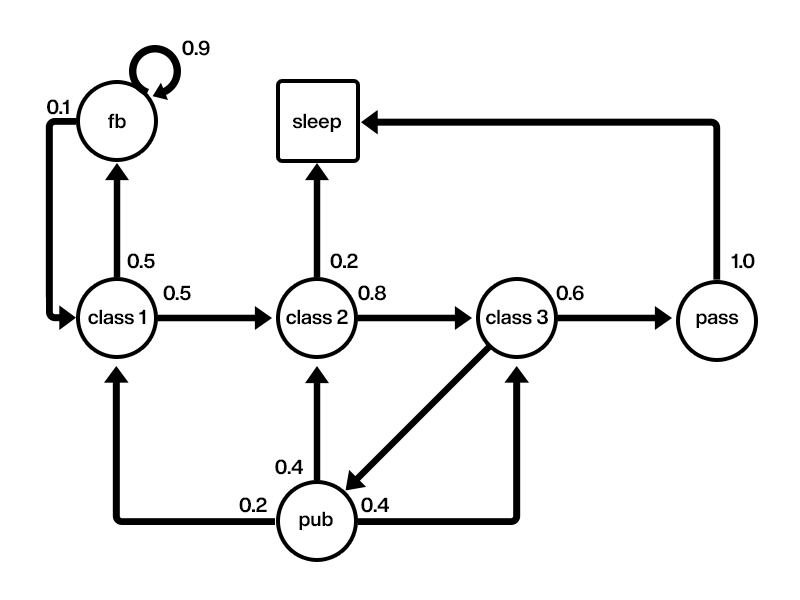

Image that we only three classes that we have to attend to and if we get through all of them we are done. If that would be that easy. We start from them <code>**class 1**</code> and there is <code>**50% probability**</code> to make it through next <code>**class 2**</code> there is as well 50% probability that we will go to look at facebook. If we at facebook and it's quite addictive there is <code>**90% probability**</code> that we kind of self transition to the same state and keep looking to the facebook. And after few iterations there is a <code>**10% probability**</code> that we will drop out of it and return to the class 1. And after a while we will make to the <code>**class 2**</code> unfortunately we are talking there about <code>**Markov processes**</code> and we feel a bit sleepy and so there is about <code>**20% probability**</code> that we fall asleep, but there is a <code>**80% probability**</code> to make it through to final class at which point we might tend to <code>**40% probability**</code> go to the pub. Which means if we go to the pub and drink few beers we might end up either regressing to the class 1 <code>**20% probability**</code> and we dont go to the pub there is <code>**60% probability**</code> that we will pass our final exam and then after that we can go to sleep. And this <code>**sleep state**</code> represent <code>**terminal state**</code> to the Markov process. A terminal state doesn't need any special machinery think of it as a <code>**self-loop**</code> and absorbing terminal state. 

Sample episodes for Student Markov Chain starting from S1 = C1

$$S_{1}, S_{2}, S_{T}$$

What it means to take samples of this. <code>**A sample is a sequance of states:**</code>

- C1 C2 C3 pass sleep
- C1 FB FB C1 C2 sleep
- C1 C2 C3 pub C2 C3 pass sleep
- C1 FB FB C1 C2 C3 pub C1 FB FB FB C1 C2 C3 pub C2 sleep

Each of these you can think of like a random sequance that are sampled from these dynamics. <code>**Thats what it means to have a random process**</code>. We get some random sequance thats drawned from the probability distribution over sequances of states. In fact because it has a Makrov property it means that it can be described by one of theses diagrams if you like. It can be described from any state that has some probabilty of transition to any other state. 

___________________________

We can look at the <code>**transition matrix**</code> with this problem. And it basically tells us that any of these states in which we might have been , what is the probability of transitioning to the any other of these states. If we would look at C2 state this row would tell us that there is 0.8 probability of transition to C3 and 0.2 chance transitioning to the sleep state.
And if we look to the all rows together that fully describes the entire dynamics of this system. And once we have this matrix we are able to sample repeatedly from this matrix and get our sample of sequance of states after this Markov process.

\begin{multline*}
P =
\begin{matrix}
      & C1  & C2  & C3  & pass & pub & fb  & sleep \\
C1    &     & 0.5 &     &      &     & 0.5 &       \\
C2    &     &     & 0.8 &      &     &     & 0.2   \\
C3    &     &     &     & 0.6  & 0.4 &     &       \\
pass  &     &     &     &      &     &     & 1.0   \\
pub   & 0.2 & 0.4 & 0.4 &      &     &     &       \\
fb    & 0.1 &     &     &      &     & 0.9 &       \\
sleep &     &     &     &      &     &     & 1.0   \\
\end{matrix}
\end{multline*}

<code>**How do we deal with modifications of these probabilities over time?:**</code>
 - Non stationary Markup process, in that case we can use the same kind of algorithms that we use in stationary case but incrementaly adjust your soliution algorithm just by tracking the best soliution that we found so far.
 - The fact that you got non stationary dynamics it just makes a more complicate Markov process it sort of augments current process but fundamentally doesn't change the structure of this being a Markov process. 

### Markov Reward Processes

So far we have not talked really about reinforcement learning. No rewards, no actions, so lets start putting some of that machinery in.

First and perhaps most important thing is to add <code>**rewards**</code>. We will create a Markov Reward process which you can thing of like a Markvo Process with value judgements saying how good it is to be in some particular state, how much reward will we accumulate acroos some particular sequance that we sampled from this Markov Process. 

<code>**A Markov reward process is a Markov chain with values.**</code>

<div class="alert alert-block alert-info">
<h2>Definition</h2>
    
<code>**A Markov Reward Process is a tuple ⟨S, P, R, 𝛾⟩**</code> 
 - <code>**S is a finite set of states**</code>
 - <code>**P is state transition probability matrix**</code> 
    
\begin{multline*}
P_{s \acute{s}} = \mathbb{P}[S_{t+1} = \acute{s} | S_{t} = s]
\end{multline*}

 - <code>**R**</code>  is a reward function

    \begin{multline*}
R_{s} = \mathbb{E}[R_{t+1} |S_{t} = s]
\end{multline*}    
    
 -<code>**𝛾**</code>  is a discoint factor
    
\begin{multline*}
\gamma \in [0,1]
\end{multline*}    
    
</div>